In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [3]:
df=pd.read_csv('/workspaces/temp/healthcare_premium_prediction/data_preprocessing/training_data.csv')
print(df.shape)
df.head(5)

(49808, 16)


,age,number_of_dependants,income_lakhs,medical_score,insurance_plan_numerical,employment_score,smoking_score,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,gender_Male,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,annual_premium_amount
0,0.148148,0.0,0.051020,0.428571,0.0,1.0,0.0,1,0,0,1,1,0,0,0,9053
1,0.203704,0.4,0.051020,0.428571,0.0,1.0,1.0,0,1,0,0,0,1,0,0,16339
2,0.574074,0.4,0.193878,0.285714,0.5,0.5,0.0,0,0,0,0,0,0,0,0,18164
3,0.222222,0.6,0.775510,0.000000,1.0,1.0,0.0,0,1,0,0,0,0,0,0,20303
4,0.000000,0.0,1.000000,0.285714,0.5,0.5,1.0,0,0,0,1,1,0,1,0,13365


In [4]:
x=df.drop('annual_premium_amount',axis='columns')
y=df['annual_premium_amount']
print(x.shape)
print(y.shape)


(49808, 15)
(49808,)


In [5]:
#train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)
print("Train data shapes--")
print(f"X train shape:{x_train.shape}")
print(f"y train shape:{y_train.shape}")
print("Test data shapes--")
print(f"X test shape:{x_test.shape}")
print(f"y test shape:{y_test.shape}")


Train data shapes--
X train shape:(34865, 15)
y train shape:(34865,)
Test data shapes--
X test shape:(14943, 15)
y test shape:(14943,)


In [6]:
#creating liner regression model
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
#fit on the train data'
model_lr.fit(x_train,y_train)
#get the score on test data

test_score = model_lr.score(x_test,y_test) 
train_score = model_lr.score(x_train,y_train)
print("Train score",train_score)
print("test score",test_score)

Train score 0.9274044461278903
test score 0.9273145899638124


In [7]:
model_lr.coef_

array([ 1.16975372e+04, -5.95681913e+02, -3.44059294e+02,  5.20902058e+03,
        1.24843078e+04,  1.44112474e+02,  2.22062978e+03, -2.68928983e+01,
        6.42649726e+01,  7.52599325e+00, -9.43959414e+02,  1.58282615e+02,
        3.36038443e+03,  1.61070649e+03,  3.55238940e+02])

In [8]:
model_lr.intercept_

np.float64(4837.5701510785)

In [9]:
coeff_value = model_lr.coef_           # Coefficients from the model
columns_names = x_test.columns         # Feature names
columns_ = ['feature', 'coefficient']  # Column names for the new DataFrame

# Create the DataFrame
coeff_df = pd.DataFrame(list(zip(columns_names, coeff_value)), columns=columns_)
print(coeff_df)

                     feature   coefficient
0                        age  11697.537239
1       number_of_dependants   -595.681913
2               income_lakhs   -344.059294
3              medical_score   5209.020575
4   insurance_plan_numerical  12484.307769
5           employment_score    144.112474
6              smoking_score   2220.629777
7           region_Northwest    -26.892898
8           region_Southeast     64.264973
9           region_Southwest      7.525993
10  marital_status_Unmarried   -943.959414
11               gender_Male    158.282615
12      bmi_category_Obesity   3360.384430
13   bmi_category_Overweight   1610.706486
14  bmi_category_Underweight    355.238940


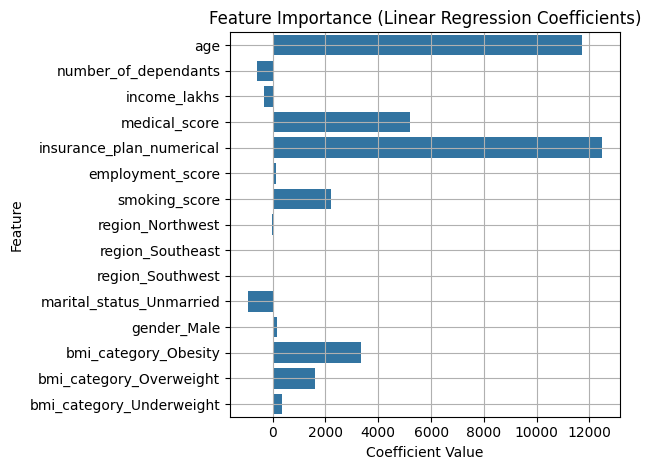

In [10]:
#plot a bar chart to visualize the coeff effect on the prediction 


sns.barplot(x='coefficient',y='feature', data=coeff_df,)

plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()


#Error analysis

In [11]:
y_pred  = model_lr.predict(x_test)
difference = y_test -y_pred
percentage_difference =difference*100/y_test
#now create a data frame 
result_map ={
    'actual_y':y_test,
    'predicted_y':y_pred,
    'percentage_difference':percentage_difference
}
result_df = pd.DataFrame(result_map)
result_df.head(9)
 


,actual_y,predicted_y,percentage_difference
33901,6539,5454.086035,16.591435
29396,11853,19673.460896,-65.978747
12849,31155,25986.748738,16.588834
34537,4395,4966.100460,-12.994322
25243,19986,20838.369605,-4.264833
43058,29549,26902.796624,8.955306
49737,15518,15308.275469,1.351492
25765,29011,27789.798349,4.209443
7654,20392,20444.062795,-0.255310


In [12]:
#check avg min and max error 
result_df['percentage_difference'].describe()

count    14943.000000
mean        -2.286827
std         23.181494
min       -127.204119
25%        -10.867356
50%          0.450843
75%          9.198159
max         61.988861
Name: percentage_difference, dtype: float64

In [13]:
#add this column in x_test 


x_test_with_Per_error = pd.concat([x_test, result_df[['percentage_difference']]], axis=1)
x_test_with_Per_error.head(3)


,age,number_of_dependants,income_lakhs,medical_score,insurance_plan_numerical,employment_score,smoking_score,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,gender_Male,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,percentage_difference
33901,0.129630,0.4,0.244898,0.000000,0.0,1.0,0.0,0,1,0,1,1,0,0,0,16.591435
29396,0.092593,0.6,0.040816,0.285714,1.0,1.0,0.0,0,0,1,0,0,0,0,0,-65.978747
12849,0.518519,0.0,0.285714,0.571429,1.0,1.0,0.0,0,0,1,1,1,0,0,1,16.588834


<Axes: xlabel='percentage_difference', ylabel='Count'>

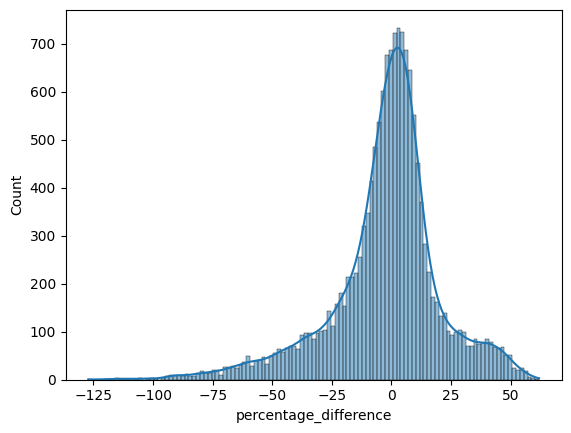

In [14]:
#plot  %error histogram
sns.histplot(result_df['percentage_difference'],kde=True)

Conclusion the errors are mainly -25 to 25 % range but also there are error of 50% and ~-125%

In [15]:
#lets make an threshold of 10 % error 
err_more_than_10Per_count  = 0
for idx,row in result_df.iterrows():
    value = abs(row['percentage_difference'])
    if value >10 :
        err_more_than_10Per_count+=1
    
print(f'Error more than 10% count :{err_more_than_10Per_count} ,Out of {y_pred.size} Record')



Error more than 10% count :7363 ,Out of 14943 Record


In [16]:
#% error more than 10%
print(f"Error more than 10% in Y_pred is:{(err_more_than_10Per_count/y_pred.size)*100.:1f} %")


Error more than 10% in Y_pred is:49.273908 %


#almost 50% of data in y_pred have error more than 10%

In [17]:
#bin the error data >10% in a data frame 
df_extreme_err = x_test_with_Per_error[np.abs(x_test_with_Per_error['percentage_difference'])>10]
print(df_extreme_err.shape)
df_extreme_err.head(3)

(7363, 16)


,age,number_of_dependants,income_lakhs,medical_score,insurance_plan_numerical,employment_score,smoking_score,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,gender_Male,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,percentage_difference
33901,0.129630,0.4,0.244898,0.000000,0.0,1.0,0.0,0,1,0,1,1,0,0,0,16.591435
29396,0.092593,0.6,0.040816,0.285714,1.0,1.0,0.0,0,0,1,0,0,0,0,0,-65.978747
12849,0.518519,0.0,0.285714,0.571429,1.0,1.0,0.0,0,0,1,1,1,0,0,1,16.588834


In [19]:
import pickle
with open('/workspaces/temp/healthcare_premium_prediction/data_preprocessing/minmax_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)


In [20]:
#now analyze the feature wise error analysis
#like which features in this extreme_error df is can cause error 
#ex if plot age vs %error and see how the error is changing on age
# Invert the scaling for the 'age' column in df_extreme_err:
# Columns that were scaled
scaled_features = [
    'age', 'number_of_dependants', 'income_lakhs',
    'medical_score', 'employment_score',
    'smoking_score', 'insurance_plan_numerical'
]

# Prepare a temporary DataFrame with scaled values
temp_scaled = df_extreme_err[scaled_features].copy()

# Inverse transform the scaled values
inversed_values = scaler.inverse_transform(temp_scaled)

# Convert back to DataFrame with original values
col_name = (f'original_{col}' for col in scaled_features)

df_original = pd.DataFrame(inversed_values, columns=col_name,
                           index=df_extreme_err.index)
df_extreme= pd.concat([ df_original,df_extreme_err['percentage_difference'],], axis=1)


df_original.head(2)


,original_age,original_number_of_dependants,original_income_lakhs,original_medical_score,original_employment_score,original_smoking_score,original_insurance_plan_numerical
33901,25.0,2.0,25.0,0.0,3.0,1.0,1.0
29396,23.0,3.0,5.0,2.0,3.0,1.0,3.0


In [21]:
df_extreme.head(2)

,original_age,original_number_of_dependants,original_income_lakhs,original_medical_score,original_employment_score,original_smoking_score,original_insurance_plan_numerical,percentage_difference
33901,25.0,2.0,25.0,0.0,3.0,1.0,1.0,16.591435
29396,23.0,3.0,5.0,2.0,3.0,1.0,3.0,-65.978747


In [22]:
print(inversed_values.shape)  

print(df_original.columns)
print(df_extreme_err.shape)    

print(df_extreme['percentage_difference'].describe())

(7363, 7)
Index(['original_age', 'original_number_of_dependants',
       'original_income_lakhs', 'original_medical_score',
       'original_employment_score', 'original_smoking_score',
       'original_insurance_plan_numerical'],
      dtype='object')
(7363, 16)
count    7363.000000
mean       -5.367631
std        32.282112
min      -127.204119
25%       -26.426893
50%       -11.125384
75%        18.539049
max        61.988861
Name: percentage_difference, dtype: float64


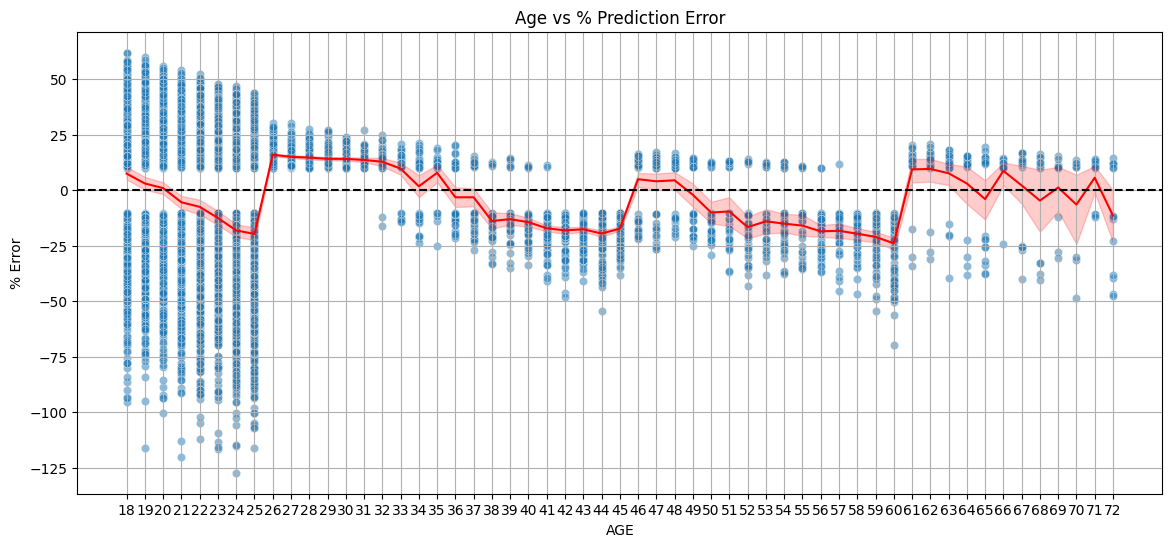

In [23]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='original_age', y='percentage_difference', data=df_extreme, alpha=0.5)
sns.lineplot(x='original_age', y='percentage_difference', data=df_extreme, color='red', estimator='mean')
plt.axhline(0, linestyle='--', color='black')
plt.title("Age vs % Prediction Error")



plt.xticks(np.arange(df_extreme['original_age'].min(), df_extreme['original_age'].max() + 1,1))
plt.grid(True)
plt.ylabel("% Error")
plt.xlabel("AGE")
plt.show()

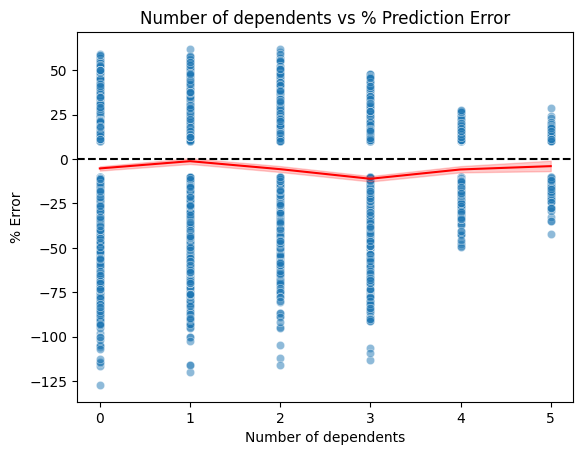

In [24]:

sns.scatterplot(x='original_number_of_dependants', y='percentage_difference', data=df_extreme, alpha=0.5)
sns.lineplot(x='original_number_of_dependants', y='percentage_difference', data=df_extreme, color='red', estimator='mean')
plt.axhline(0, linestyle='--', color='black')
plt.title("Number of dependents vs % Prediction Error")
plt.ylabel("% Error")
plt.xlabel("Number of dependents")
plt.show()

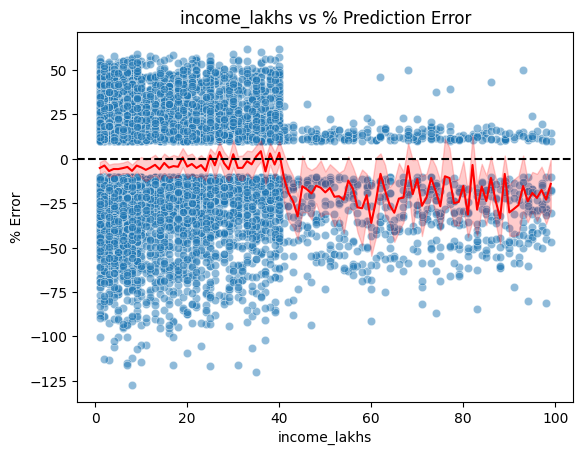

In [170]:

sns.scatterplot(x='original_income_lakhs', y='percentage_difference', data=df_extreme, alpha=0.5)
sns.lineplot(x='original_income_lakhs', y='percentage_difference', data=df_extreme, color='red', estimator='mean')
plt.axhline(0, linestyle='--', color='black')
plt.title("income_lakhs vs % Prediction Error")
plt.ylabel("% Error")
plt.xlabel("income_lakhs")
plt.show()

By this analysis the conclusion we got that : maximum %err is falls 25 or 26 age group , and also the number of dependent and income is low the  %err is also high ,But its maybe due to age ,less age ->less income + less number of dependent 
//and upto 65% of the data set have age less than 26 so age is main responsible attribute for the err

We use model segmentation :
where we train 2 diff model in 2 diff data set
-one model is trined on data set where age group >26
-another will be train on data set where age <26

In [25]:

df_age_less_than_eql_25 = df_extreme[df_extreme.original_age <=25]

max_age =df_age_less_than_eql_25 ['original_age'].max()


max_age_rows = df_age_less_than_eql_25 [df_age_less_than_eql_25 ['original_age'] == max_age]
max_age_rows.head()


,original_age,original_number_of_dependants,original_income_lakhs,original_medical_score,original_employment_score,original_smoking_score,original_insurance_plan_numerical,percentage_difference
33901,25.0,2.0,25.0,0.0,3.0,1.0,1.0,16.591435
33436,25.0,0.0,37.0,0.0,1.0,2.0,1.0,25.316649
7555,25.0,1.0,36.0,0.0,2.0,3.0,1.0,-20.621461
16292,25.0,0.0,5.0,0.0,1.0,3.0,2.0,-18.572891
26033,25.0,0.0,29.0,1.0,1.0,1.0,1.0,-10.308273


In [26]:
# scaled_features = [
#     'age', 'number_of_dependants', 'income_lakhs',
#     'medical_score', 'employment_score',
#     'smoking_score', 'insurance_plan_numerical'
# ]
#7 scaled columns
values = [
    [25, 2, 3, 4, 5, 6, 7]  # one row with 7 features
]
scaled_values = scaler.transform(values)
print(scaled_values)



[[0.12962963 0.4        0.02040816 0.57142857 2.         2.5
  3.        ]]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [27]:

#split the data set based on that
df_young = df[df.age<=0.12962963]
print(df_young.shape)
df_rest = df[df.age > 0.12962963]
print(df_rest.shape)
#save them 
df_young.to_csv('dataset_young_age.csv',index=False)
df_rest.to_csv('dataset_rest.csv',index=False)

(20054, 16)
(29754, 16)
